In [16]:
import time
import matplotlib.pyplot as plt
import numpy as np

from qarray import (DotArray, GateVoltageComposer, dot_occupation_changes)

In [17]:
# setting up the constant capacitance model_threshold_1
model = DotArray(
    Cdd=np.array([
        [0., 0.1],
        [0.1, 0.]
    ]),
    Cgd=np.array([
        [1., 0.1],
        [0.1, 1]
    ]),
    algorithm='default',
    implementation='rust', charge_carrier='h', T=0.,
)

# creating the dot voltage composer, which helps us to create the dot voltage array for sweeping in 1d and 2d
voltage_composer = GateVoltageComposer(n_gate=model.n_gate)

In [18]:
# using the dot voltage composer to create the dot voltage array for the 2d sweep
vg = voltage_composer.do2d(
    x_gate=0, x_min = -10, x_max = 5, x_res = 400,
    y_gate=1, y_min = -10, y_max = 5, y_res = 400
)

Elapsed time: 0.24 s or one pixel every 1.50 us


Text(0, 0.5, 'Vg1 (V)')

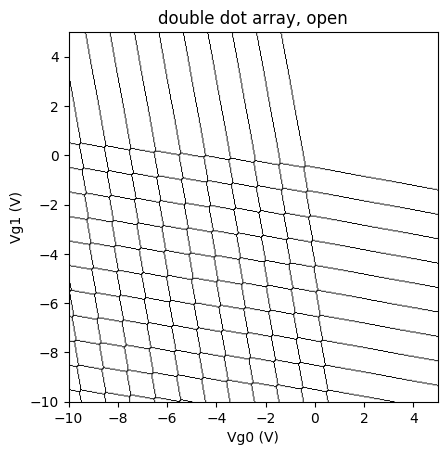

In [19]:
# calculating the dot occupation changes for the 2d sweep for an open double dot 
t0 = time.time()
n = model.ground_state_open(vg)  # computing the ground state by calling the function
t1 = time.time()
print(f'Elapsed time: {t1 - t0:.2f} s or one pixel every { 1e6 * (t1 - t0) / (vg.size // 2):.2f} us')

z = dot_occupation_changes(n)  # computing when the dot occupation changes

plt.imshow(z, extent=(vg[..., 0].min(), vg[..., 0].max(), vg[..., 1].min(), vg[..., 1].max()), origin='lower', cmap='binary')
plt.title('double dot array, open')
plt.xlabel('Vg0 (V)')
plt.ylabel('Vg1 (V)')

Elapsed time: 0.28 s or one pixel every 1.76 us


Text(0, 0.5, 'Vg1 (V)')

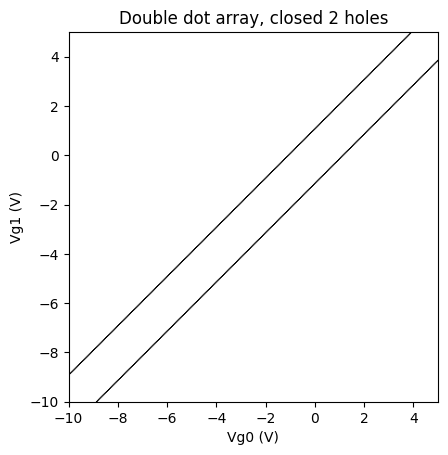

In [20]:
# calculating the dot occupation changes for the 2d sweep for an closed double dot containing 2 holes 
t0 = time.time()
n = model.ground_state_closed(vg, n_charges=2)  # computing the ground state by calling the function
t1 = time.time()
print(f'Elapsed time: {t1 - t0:.2f} s or one pixel every { 1e6 * (t1 - t0) / (vg.size // 2):.2f} us')

z = dot_occupation_changes(n)  # computing when the dot occupation changes

plt.imshow(z, extent=(vg[..., 0].min(), vg[..., 0].max(), vg[..., 1].min(), vg[..., 1].max()), origin='lower', cmap='binary')
plt.title('Double dot array, closed 2 holes')
plt.xlabel('Vg0 (V)')
plt.ylabel('Vg1 (V)')